In [1]:
#타랑께 주말
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
a = pd.read_csv('주말_최종.csv',index_col = 0,encoding = 'utf-8')#주말 사용 건 추출
df = pd.DataFrame(a) #사용량중 주말건 추출
df

,출발시각,사용시간
1,2020-07-04 7:01,0 days 00:14:38
2,2020-07-04 7:02,0 days 00:12:40
3,2020-07-04 8:30,0 days 00:06:02
4,2020-07-04 9:07,0 days 02:08:58
5,2020-07-04 9:17,0 days 00:23:25
...,...,...
3372,2021-01-31 19:47,0 days 01:50:53
3373,2021-01-31 20:20,0 days 01:00:47
3374,2021-01-31 20:20,0 days 00:24:51
3375,2021-01-31 20:21,0 days 00:24:41


--------

# 탑승지속시간

In [34]:
usage=[]
for x in range(1, len(df)):
    usage.append(df['사용시간'][x]) # 주말 사용시간 추출

## hour

In [3]:
hour = []
minute = [] #시, 분 분리 추출
for i in range(0, len(usage)):
    if usage[i][8] == '0':
        minute.append(usage[i][10:12])
    elif usage[i][8] != '0' :
        hour.append(usage[i][8])

In [4]:
hour_int = list(map(int, hour))
remove_set = {4, 5, 6, 7, 8, 9}
hour_new = [i for i in hour_int if i not in remove_set]

In [5]:
dict = {}
for v in hour_new:
    if dict.get(v): dict[v]+=1
    else : dict[v]=1
        
print(dict)

{2: 86, 1: 1068, 3: 37}


In [6]:
hour = [60, 120, 180]
hour_count = (list(dict.values()))

## minute

In [7]:
minute.sort()

In [8]:
dict1 = {}
for v in minute:
    if dict1.get(v): dict1[v]+=1
    else : dict1[v]=1

In [9]:
x = (list(dict1.keys()))
y = (list(dict1.values()))
x = list(map(int, x))

In [10]:
minute_by_10 = []
division = [10, 20, 30, 40, 50, 60] #10분단위 분 추출
for i in division:
    q = sum(y[i-10:i])
    minute_by_10.append(q)

## hour + minute

In [30]:
a = division + hour
b = minute_by_10 + hour_count

In [31]:
a = ['~10분', '~20분', '~30분', '~40분', '~50분', '~60분', '~120분', '~180분', '그외']

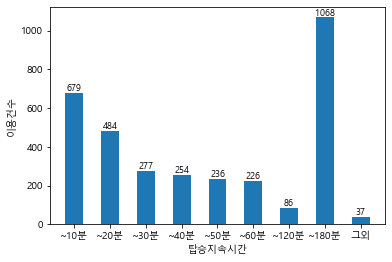

In [33]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel('탑승지속시간')
plt.ylabel('이용건수')
plt.bar(a, b, width=0.5)
 # 시각화
for i,v in enumerate(a) :
    plt.text(v, b[i], b[i],
            fontsize =9,
             color = 'black',
             horizontalalignment='center',
              verticalalignment='bottom'
            )




plt.show()

# 시간대별 현황

In [14]:
df['출발시각'][1]

'2020-07-04 7:01'

In [15]:
start=[]
for x in range(1, len(df)):
    start.append(df['출발시각'][x])

In [16]:
time1 = []
for i in range(0, len(start)):
    if start[i][12] == ':':
        time1.append(start[i][11])
    else:
        time1.append(start[i][11:13])

In [17]:
time1_list = [int (i) for i in time1]

In [18]:
time1_list.sort()

In [19]:
dict2 = {}
for v in time1_list:
    if dict2.get(v): dict2[v]+=1
    else : dict2[v]=1
        
print(dict2)

{7: 45, 8: 38, 9: 78, 10: 118, 11: 149, 12: 199, 13: 249, 14: 337, 15: 399, 16: 439, 17: 378, 18: 286, 19: 312, 20: 344, 21: 3, 23: 1}


In [20]:
a = (list(dict2.keys()))
b = (list(dict2.values()))

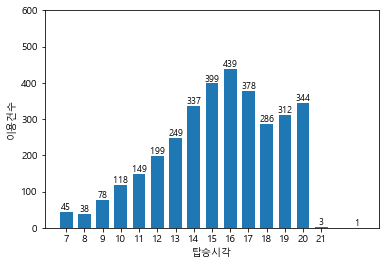

In [22]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel('탑승시각')
plt.ylabel('이용건수')
plt.xticks(range(min(a),max(a)-1,1))
plt.ylim([0, 600])
plt.bar(a, b, width=0.7)

for i,v in enumerate(a) :
    plt.text(v, b[i], b[i],
            fontsize =9,
             color = 'black',
             horizontalalignment='center',
              verticalalignment='bottom'
            )

plt.show()

---------